In [83]:
import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [122]:
path = "Crop_recommendation.csv"
data = pd.read_csv(path)
data.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [85]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [86]:
data.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


### Exploratory Data analysis

In [87]:
# unique labels
data['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

<Axes: title={'center': 'Label Distribution'}, ylabel='label'>

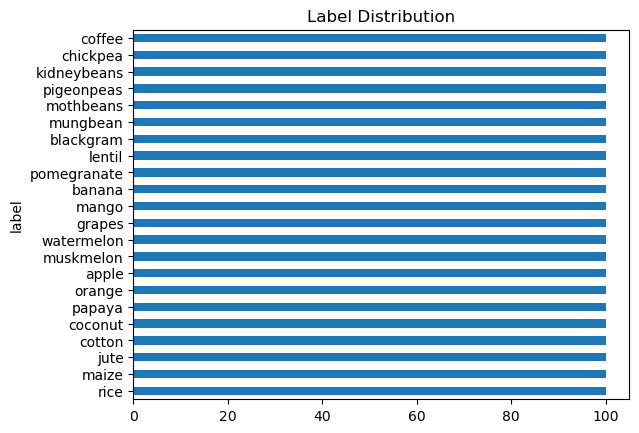

In [88]:
# plot of each label
plt.title("Label Distribution")
data['label'].value_counts().plot(kind="barh")

<p>There is a uniform number of each class in the data</p>

## pairplot

C:\Users\Moxie\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Moxie\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Moxie\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Moxie\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

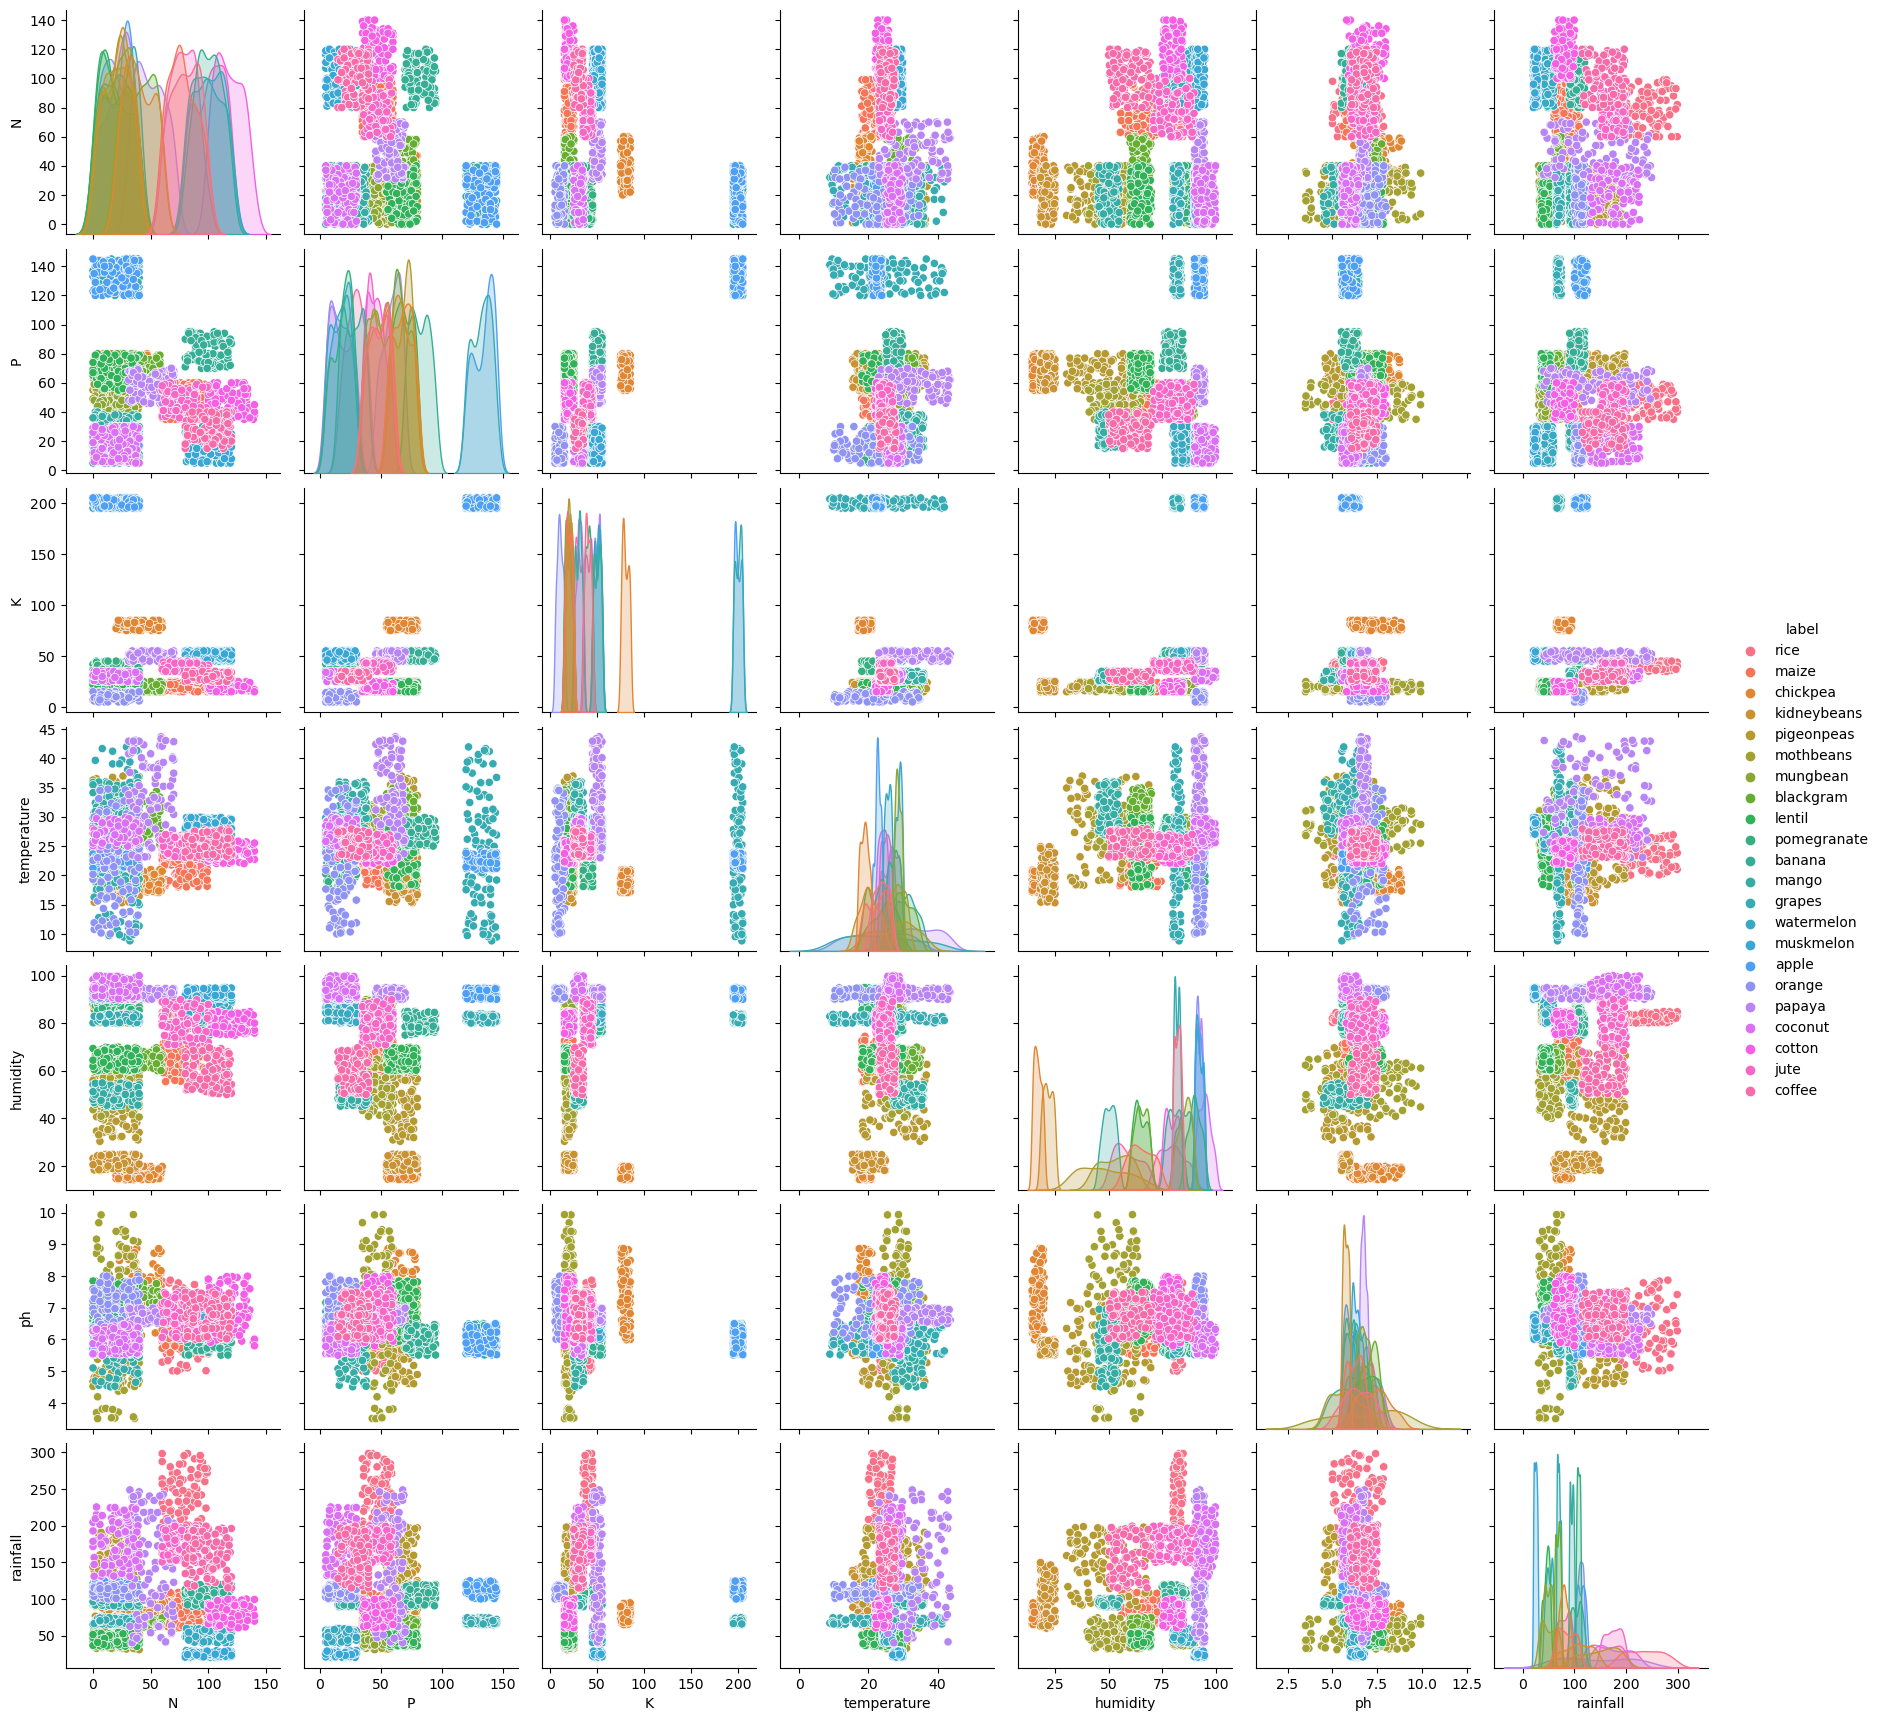

In [36]:
sns.pairplot(data=data, hue="label")

C:\Users\Moxie\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Moxie\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Figure size 1200x900 with 0 Axes>

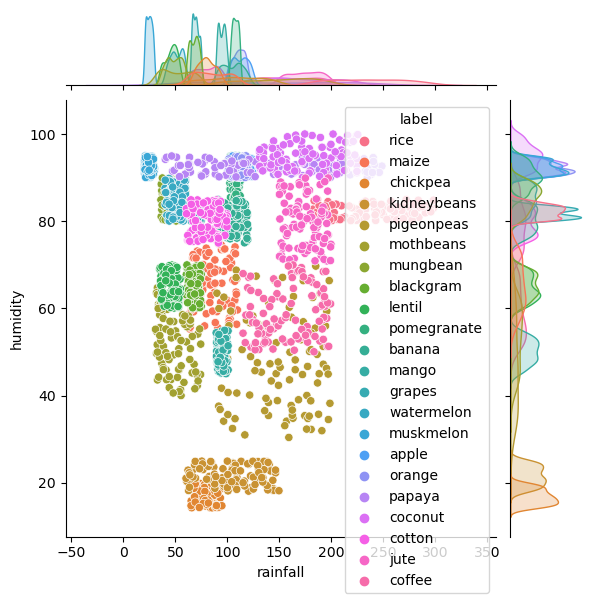

In [44]:
fig = plt.figure(figsize=(12,9))
sns.jointplot(x=data["rainfall"], y=data["humidity"], hue=data["label"])

<Axes: title={'center': 'Relationship between Potassium and Humidity'}, xlabel='K', ylabel='humidity'>

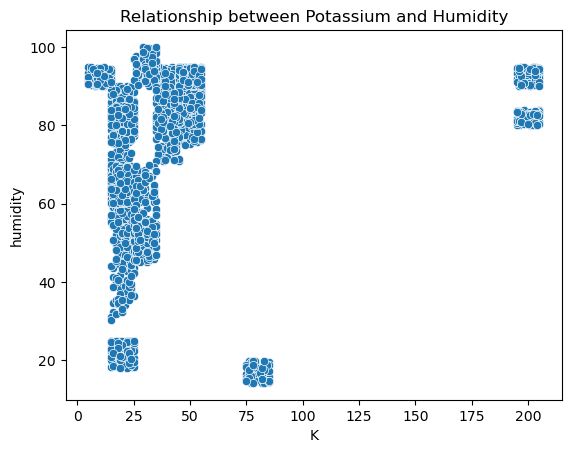

In [51]:
plt.title("Relationship between Potassium and Humidity")
sns.scatterplot(data=data, x=data["K"], y=data["humidity"])

<Axes: title={'center': 'Relationship between Potassium and Rainfall'}, xlabel='rainfall', ylabel='K'>

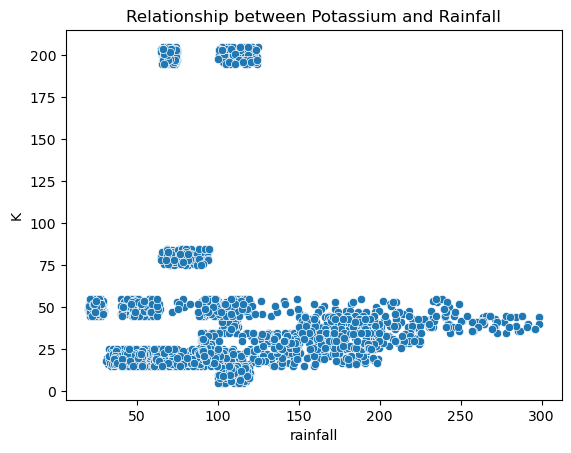

In [54]:
plt.title("Relationship between Potassium and Rainfall")
sns.scatterplot(data=data, x=data["rainfall"], y=data["K"])

<Axes: title={'center': 'Relationship between Phosphorus and Rainfall'}, xlabel='rainfall', ylabel='P'>

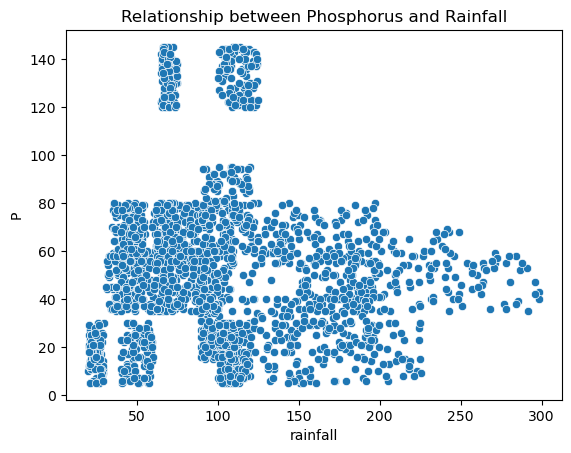

In [64]:
plt.title("Relationship between Phosphorus and Rainfall")
sns.scatterplot(data=data, x=data["rainfall"], y=data["P"])

In [61]:
data[data["K"] > 175]["label"].unique()

array(['grapes', 'apple'], dtype=object)

In [63]:
data[data["K"] > 175].max()

N                      40
P                     145
K                     205
temperature     41.948657
humidity        94.920481
ph               6.499605
rainfall       124.983162
label              grapes
dtype: object

## Data Preprocessing

In [123]:
## categorize labels: label encoding
data["target"] = data["label"].replace(
    to_replace = {'rice': 0, 'maize':1, 'chickpea':2, 'kidneybeans':3, 'pigeonpeas':4,
       'mothbeans':5, 'mungbean':6, 'blackgram':7, 'lentil':8, 'pomegranate':9,
       'banana':10, 'mango':11, 'grapes':12, 'watermelon':13, 'muskmelon':14, 'apple':15,
       'orange':16, 'papaya':17, 'coconut':18, 'cotton':19, 'jute':20, 'coffee':21}
)
data

,N,P,K,temperature,humidity,ph,rainfall,label,target
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice,0
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice,0
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice,0
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice,0
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice,0
...,...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee,21
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee,21
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee,21
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee,21


In [106]:
data["label"].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [124]:
# Split data into depenedent and independent variables
y = data["target"]
X = data.drop(columns=["label", "target"])

<Axes: >

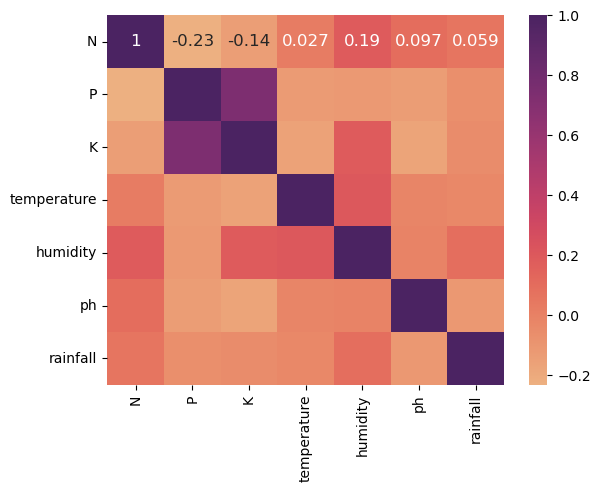

In [133]:
corr = X.corr()
sns.heatmap(corr, annot=True, annot_kws={'size':12}, cmap="flare")

In [226]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y, random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1650, 7)
(550, 7)
(1650,)
(550,)


## Feature Scaling

In [227]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [228]:
y_train.unique()

array([ 5,  9, 17,  4, 15,  3, 16,  0,  6, 13, 18, 20,  8,  2, 19, 12, 11,
       14,  1, 21, 10,  7], dtype=int64)

## Artificial Neural Network approach

In [257]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

In [258]:
model = Sequential([
    Dense(units=60, activation='relu'),
    Dense(units=40, activation='relu'),
    Dense(units=22, activation='softmax')
])

In [259]:
opt = tf.keras.optimizers.Adam()
loss = tf.keras.losses.SparseCategoricalCrossentropy()
acc = tf.keras.metrics.SparseCategoricalAccuracy()


model.compile(
    optimizer = opt,
    loss = loss,
    metrics = ['accuracy', acc]
)

In [260]:
history = model.fit(x_train, y_train, epochs=50, validation_split=0.2, verbose=1)
history

Epoch 1/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.1483 - loss: 2.9848 - sparse_categorical_accuracy: 0.1483 - val_accuracy: 0.2909 - val_loss: 2.6048 - val_sparse_categorical_accuracy: 0.2909
Epoch 2/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4108 - loss: 2.4673 - sparse_categorical_accuracy: 0.4108 - val_accuracy: 0.6364 - val_loss: 1.9103 - val_sparse_categorical_accuracy: 0.6364
Epoch 3/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6669 - loss: 1.7342 - sparse_categorical_accuracy: 0.6669 - val_accuracy: 0.7485 - val_loss: 1.2765 - val_sparse_categorical_accuracy: 0.7485
Epoch 4/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7993 - loss: 1.1356 - sparse_categorical_accuracy: 0.7993 - val_accuracy: 0.8061 - val_loss: 0.8850 - val_sparse_categorical_accuracy: 0.8061
Epoch 5/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8805 - loss: 0.7546 - sparse_categorical_accuracy: 0.8805 - val_accuracy: 0.8758 - val_loss: 0.6639 - val_spars

In [261]:
history = pd.DataFrame(history.history)
history

,accuracy,loss,sparse_categorical_accuracy,val_accuracy,val_loss,val_sparse_categorical_accuracy
0,0.183333,2.890697,0.183333,0.290909,2.604784,0.290909
1,0.478788,2.302249,0.478788,0.636364,1.910302,0.636364
2,0.705303,1.578596,0.705303,0.748485,1.276456,0.748485
3,0.807576,1.031909,0.807576,0.806061,0.884976,0.806061
4,0.876515,0.718404,0.876515,0.875758,0.663871,0.875758
5,0.903030,0.542475,0.903030,0.887879,0.530558,0.887879
6,0.918939,0.430167,0.918939,0.912121,0.429961,0.912121
7,0.931818,0.352439,0.931818,0.918182,0.358382,0.918182
8,0.940152,0.297079,0.940152,0.921212,0.312822,0.921212
9,0.950000,0.252996,0.950000,0.921212,0.271307,0.921212


In [262]:
history[-1:0:-1]

,accuracy,loss,sparse_categorical_accuracy,val_accuracy,val_loss,val_sparse_categorical_accuracy
49,0.992424,0.029453,0.992424,0.975758,0.052022,0.975758
48,0.994697,0.031147,0.994697,0.975758,0.056632,0.975758
47,0.993939,0.030447,0.993939,0.978788,0.058181,0.978788
46,0.992424,0.030902,0.992424,0.990909,0.053482,0.990909
45,0.991667,0.033079,0.991667,0.984848,0.051612,0.984848
44,0.993182,0.034509,0.993182,0.978788,0.054337,0.978788
43,0.992424,0.034665,0.992424,0.984848,0.055020,0.984848
42,0.990909,0.036525,0.990909,0.978788,0.057300,0.978788
41,0.993182,0.035921,0.993182,0.984848,0.056576,0.984848
40,0.989394,0.038891,0.989394,0.978788,0.058634,0.978788


C:\Users\Moxie\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Moxie\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Moxie\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Moxie\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

<Axes: title={'center': 'Cost Function'}, ylabel='loss'>

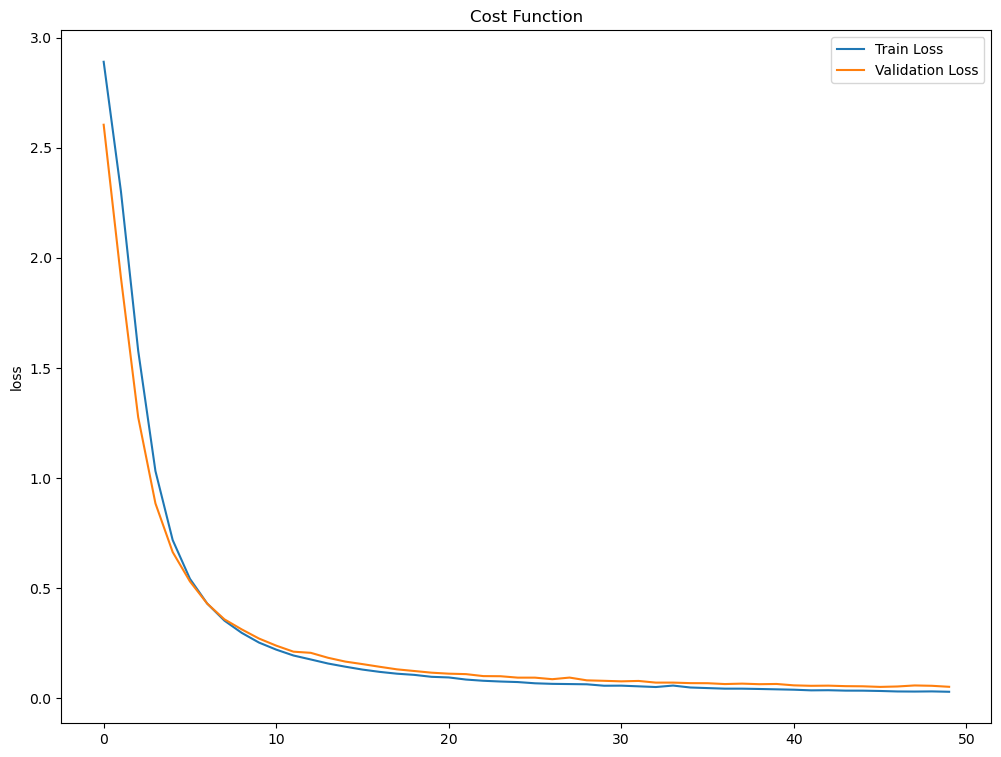

In [263]:
plt.figure(figsize=(12,9))
plt.title("Cost Function")
sns.lineplot(history['loss'], label="Train Loss")
sns.lineplot(history['val_loss'], label="Validation Loss")

In [267]:
loss, accuracy, sparse_accuracy = model.evaluate(x_test, y_test)

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9687 - loss: 0.0848 - sparse_categorical_accuracy: 0.9687 


## Results
<p>Training data: 0.992424</p>
<p>Validation data: 0.975758</p>
<p>Test data: 0.9687 </p>